# Tratamento dos dados

In [31]:
import pandas as pd

file_path = r'.\dataset _original _rodada _1 _(vinho _branco) _FieldSpec.xlsx'
#file_path = r'C:\Users\lenau\Documents\GitHub\field_spec_data_tests\dataset_original_rodada_1_(vinho_branco)_FieldSpec.xlsx'

#importando o arquivo e guardando na variável file_path

fs_df = pd.read_excel(file_path)
#o pandas como pd lê o arquivo em file_path e guarda na variavel fs_df

#fs_df mostra o arquivo completo

fs_df.tail()

,Wavelength,Date,Tank,TA,AV,AT,pH,MV,AR,350,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
37,amostra_00038.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.503835,...,2.656636,2.550109,2.501081,2.471406,2.529202,2.619732,2.639313,2.598884,2.575628,2.642086
38,amostra_00039.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.664785,...,2.797181,2.758138,3.052151,3.213511,3.071573,3.178512,3.150150,3.103570,3.097533,3.154010
39,amostra_00040.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.863774,...,3.127336,2.887030,2.822618,2.870859,2.779617,2.837596,2.990740,2.869202,2.732040,2.635091
40,amostra_00041.asd.txt,2022-11-09,110,11.5,0.29,5.17,3.8,995,1.8,1.670042,...,2.718212,2.633415,2.549066,2.544755,2.590426,2.767958,3.169085,3.571220,3.605718,4.104746
41,amostra_00042.asd.txt,2022-11-09,110,11.5,0.27,5.10,3.8,995,1.8,1.695179,...,2.745712,2.794190,2.618852,2.728730,2.796776,2.743646,3.205304,3.058834,2.688029,2.637008


In [45]:
import pandas as pd
import numpy as np
# Supondo que fs_df já esteja definido
# params contém as colunas específicas que queremos
params = ['TA', 'AV', 'AT', 'pH', 'MV', 'AR']
# Seleciona as colunas especificadas em params e remove linhas com valores NaN
fs_params = fs_df[params].dropna()
# Seleciona as colunas de interesse (da coluna 39 até a coluna 2130)
fs_vars = fs_df.iloc[:, 39:2130].columns.to_list()
# Concatena as colunas de params e fs_vars
fs = fs_vars
# Seleciona as colunas especificadas em fs do dataframe fs_df e remove linhas com valores NaN
dados_wl = fs_df[fs].dropna()
# Exibe o dataframe resultante
#print(fs_df_selected)
# Cria um array de comprimentos de onda
wl = np.arange(380, 2471, 1)
# Exibe os comprimentos de onda
print(wl)
#dados_wl
#fs

[ 380  381  382 ... 2468 2469 2470]


# Pré-processamento dos dados


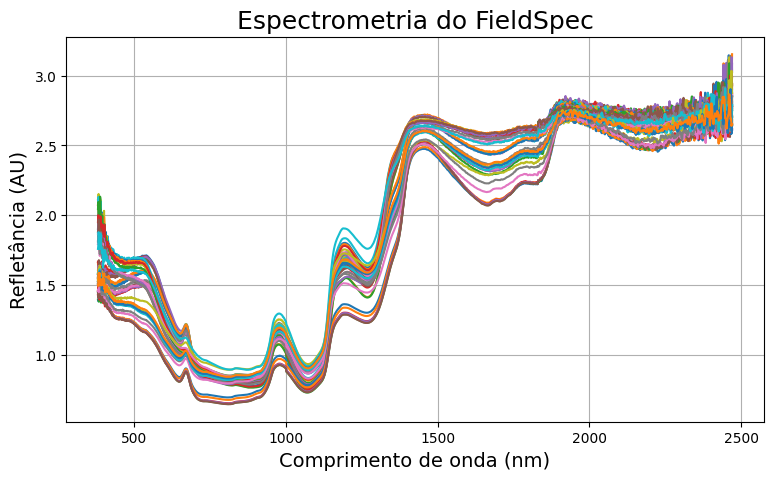

In [33]:
import matplotlib.pyplot as plt
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, dados_wl.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Espectrometria do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


### Savitzky-Golay

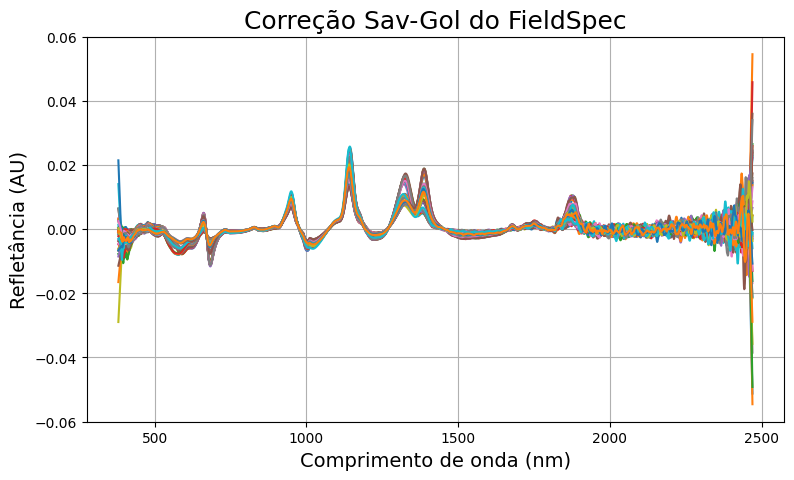

In [34]:
from scipy.signal import savgol_filter
# Aplica a função savgol_filter aos dados x
# para calcular a primeira derivada dos dados
# utilizando uma janela de tamanho 20 e um polinômio de ordem 1
sav_gol = savgol_filter(dados_wl, 21, polyorder=2, deriv=1) 
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9,5))
# Plota os dados contidos no DataFrame df em relação aos valores do eixo x x_axis_fs
plt.plot(wl, sav_gol.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("Correção Sav-Gol do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()


In [35]:
sav_gol

array([[-0.00095341, -0.00103889, -0.00112438, ..., -0.04285028,
        -0.0470486 , -0.05124691],
       [-0.00651368, -0.00604967, -0.00558567, ...,  0.04497508,
         0.04980569,  0.05463629],
       [ 0.00292831,  0.00276221,  0.00259611, ...,  0.00166728,
         0.00299411,  0.00432094],
       ...,
       [-0.00299326, -0.0031341 , -0.00327494, ..., -0.00163936,
        -0.00137255, -0.00110575],
       [-0.00655173, -0.00642273, -0.00629372, ..., -0.00783663,
        -0.00926391, -0.01069118],
       [-0.00054165, -0.00060451, -0.00066738, ..., -0.02287348,
        -0.02586437, -0.02885527]])

In [36]:
# Criando um DataFrame a partir dos dados
df = pd.DataFrame(sav_gol)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_savgol_ordem_1.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### MSC

In [37]:
def apply_msc(df):
    """
    Aplica a correção multiplicativa de espalhamento (MSC) aos dados espectroscópicos.
    
    Parâmetros:
    df : pandas.DataFrame
        DataFrame contendo os dados espectroscópicos. As linhas devem ser amostras e as colunas devem ser comprimentos de onda.
    
    Retorna:
    pandas.DataFrame
        DataFrame com os dados corrigidos pelo MSC.
    """
    
    # Calcula o espectro médio de referência
    mean_spectrum = df.mean(axis=0)
    
    # Lista para armazenar os espectros corrigidos
    corrected_spectra = []
    
    # Aplica MSC a cada espectro individualmente
    for i in range(df.shape[0]):
        spectrum = df.iloc[i, :]
        
        # Ajusta uma linha reta ao espectro médio de referência
        slope, intercept = np.polyfit(mean_spectrum, spectrum, 1)
        
        # Corrige o espectro
        corrected_spectrum = (spectrum - intercept) / slope
        corrected_spectra.append(corrected_spectrum)
    
    # Converte a lista de espectros corrigidos de volta para um DataFrame
    corrected_df = pd.DataFrame(corrected_spectra, columns=df.columns)
    
    return corrected_df

dados_wl
df_msc = apply_msc(dados_wl)

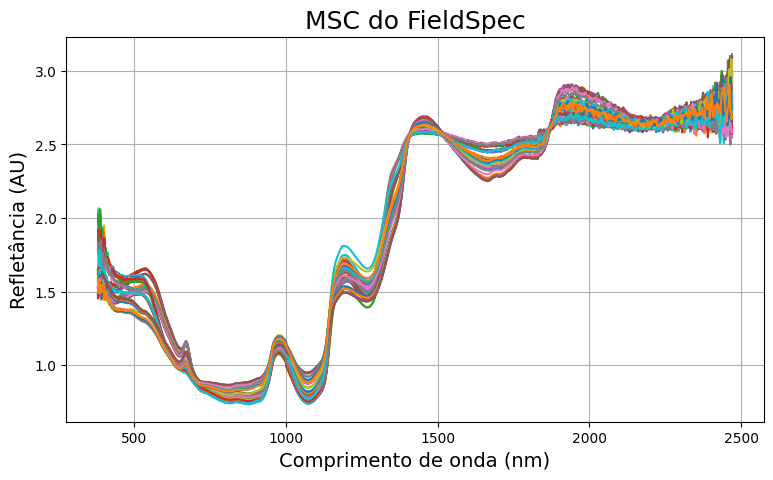

In [38]:
# Define o tamanho da figura como 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos
plt.plot(np.arange(380, 2471), df_msc.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" com tamanho de fonte 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" com tamanho de fonte 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Espectrometria do FieldSpec" com tamanho de fonte 18
plt.title("MSC do FieldSpec", size=18)
# Ativa a grade no gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

In [39]:
# Criando um DataFrame a partir dos dados
df = pd.DataFrame(df_msc)
# Nome do arquivo Excel a ser exportado
filename = 'dataset_msc.xlsx'
# Exportando o DataFrame para um arquivo Excel, excluindo o índice das linhas
df.to_excel(filename, index=False)
# Imprimindo uma mensagem indicando que o conjunto de dados foi exportado com sucesso para o Excel
print("Dataset exported successfully to Excel.")

Dataset exported successfully to Excel.


### SNV

In [41]:
def snv(input_data):
    """
    Aplica a transformação Standard Normal Variate (SNV) aos dados de entrada.
    
    Parameters:
    input_data (numpy.ndarray): Dados de entrada, onde cada linha é um espectro.
    
    Returns:
    numpy.ndarray: Dados transformados após a aplicação do SNV.
    """
    # Calcular a média de cada linha
    mean = np.mean(input_data, axis=1, keepdims=True)
    # Calcular o desvio padrão de cada linha
    std_dev = np.std(input_data, axis=1, keepdims=True)
    # Aplicar a transformação SNV
    snv_data = (input_data - mean) / std_dev
    return snv_data

# Exemplo de DataFrame (substitua pelo seu DataFrame real)
dados_wl

# Certifique-se de que os dados são numéricos
if not np.issubdtype(dados_wl.values.dtype, np.number):
    raise ValueError("Todos os dados de entrada devem ser numéricos.")

# Aplicando a transformação SNV ao DataFrame
df_snv = snv(dados_wl.values)
df_snv = pd.DataFrame(dados_wl, columns=dados_wl.columns)
#df_snv

In [42]:
# Defina o nome do arquivo onde deseja salvar os dados corrigidos
filename = "dataset_snv.xlsx"

# Salve os dados corrigidos em um novo arquivo Excel
df_snv.to_excel(filename, index=False)

# Exiba uma mensagem indicando que o arquivo foi salvo com sucesso
print(f"Dados corrigidos salvos com sucesso em {filename}")

Dados corrigidos salvos com sucesso em dataset_snv.xlsx


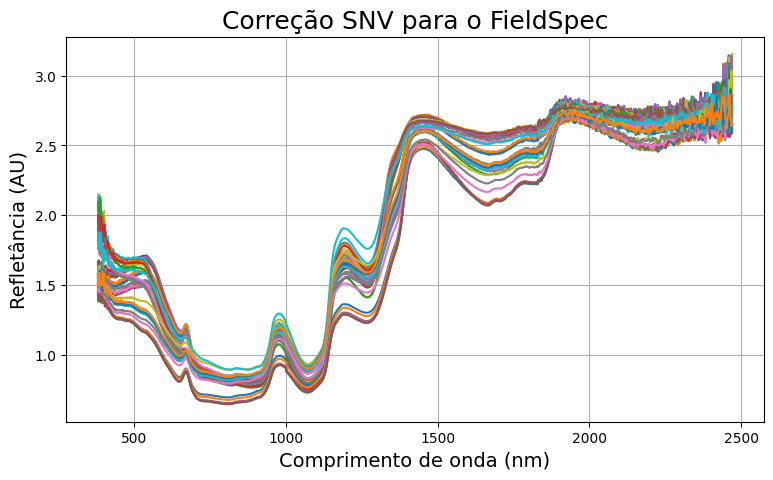

In [43]:
# Cria uma figura para o gráfico com tamanho 12x9 polegadas
plt.figure(figsize=(9, 5))
# Plota os dados corrigidos SNV em relação ao eixo x wl
plt.plot(wl, df_snv.T)
# Define o rótulo do eixo x como "Comprimento de onda (nm)" e o tamanho da fonte como 14
plt.xlabel("Comprimento de onda (nm)", size=14)
# Define o rótulo do eixo y como "Refletância (AU)" e o tamanho da fonte como 14
plt.ylabel("Refletância (AU)", size=14)
# Define o título do gráfico como "Correção SNV para o FieldSpec" e o tamanho da fonte como 18
plt.title("Correção SNV para o FieldSpec", size=18)
# Adiciona uma grade ao gráfico
plt.grid("on")
# Exibe o gráfico
plt.show()

# Divisão de dados